In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("parsed_England.csv")
df

,Unnamed: 0,subEventName,tags,positions,matchId,eventName,teamId,matchPeriod,eventSec,id,passportArea,weight,currentTeamId,height,role,birthArea,foot,shortName,currentNationalTeamId,player,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,label,date,referees,duration,competitionId
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",2499719,Pass,1609,1H,2.758649,177959171,"{'name': 'Guadeloupe', 'id': 312, 'alpha3code'...",73.0,1609.0,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",right,A. Lacazette,NaN,25413 - Alexandre Lacazette,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",2499719,Pass,1631,2H,2.836169,177960135,"{'name': 'Japan', 'id': '392', 'alpha3code': '...",70.0,1631.0,174.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Japan', 'id': '392', 'alpha3code': '...",right,S. Okazaki,12913.0,14763 - Shinji Okazaki,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
2,1,High pass,['Accurate'],"(32.55, 53.04)",2499719,Pass,1609,1H,4.946850,177959172,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",75.0,1609.0,189.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",right,R. Holding,NaN,370224 - Rob Holding,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
3,902,High pass,['Not accurate'],"(65.1, 39.44)",2499719,Pass,1631,2H,5.311682,177960136,"{'name': 'England', 'id': '0', 'alpha3code': '...",79.0,1631.0,188.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': '0', 'alpha3code': '...",right,H. Maguire,2413.0,8653 - Harry Maguire,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
4,2,Head pass,['Accurate'],"(53.55, 51.0)",2499719,Pass,1609,1H,6.542188,177959173,"{'name': 'Germany', 'id': '276', 'alpha3code':...",76.0,1609.0,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':...",left,M. \u00d6zil,3148.0,3319 - Mesut \u00d6zil,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643145,642431,Simple pass,['Accurate'],"(44.1, 6.12)",2500098,Pass,1633,1H,2922.201196,251595533,"{'name': 'Ireland Republic', 'id': 372, 'alpha...",70.0,1633.0,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",right,M. Noble,NaN,8561 - Mark Noble,Played,4405654,38,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",181150,2018-05-13 14:00:00,1633,London Stadium,"West Ham United - Everton, 3 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 408156, 'role': 'referee'}, {'r...",Regular,364
643146,642432,High pass,['Accurate'],"(12.6, 31.28)",2500098,Pass,1633,1H,2929.045430,251595535,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",80.0,1633.0,190.0,"{'code2': 'GK', 'code3': 'GKP', 'name': 

In [3]:
#df = df.dropna()

## Baseline Model: 

- Given an event, predict the time until the next goal

- Given an event, predict who the next goal scorer will be 

- Think about splitting up the dataset to make Support Vector Classifier to work

## Feature Engineering:

- Get the distance between each feature

In [4]:
df["Win_Bool"] = 1*(df["teamId"] == df["winner"])
df

,Unnamed: 0,subEventName,tags,positions,matchId,eventName,teamId,matchPeriod,eventSec,id,passportArea,weight,currentTeamId,height,role,birthArea,foot,shortName,currentNationalTeamId,player,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,label,date,referees,duration,competitionId,Win_Bool
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",2499719,Pass,1609,1H,2.758649,177959171,"{'name': 'Guadeloupe', 'id': 312, 'alpha3code'...",73.0,1609.0,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",right,A. Lacazette,NaN,25413 - Alexandre Lacazette,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,1
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",2499719,Pass,1631,2H,2.836169,177960135,"{'name': 'Japan', 'id': '392', 'alpha3code': '...",70.0,1631.0,174.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Japan', 'id': '392', 'alpha3code': '...",right,S. Okazaki,12913.0,14763 - Shinji Okazaki,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,0
2,1,High pass,['Accurate'],"(32.55, 53.04)",2499719,Pass,1609,1H,4.946850,177959172,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",75.0,1609.0,189.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",right,R. Holding,NaN,370224 - Rob Holding,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,1
3,902,High pass,['Not accurate'],"(65.1, 39.44)",2499719,Pass,1631,2H,5.311682,177960136,"{'name': 'England', 'id': '0', 'alpha3code': '...",79.0,1631.0,188.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': '0', 'alpha3code': '...",right,H. Maguire,2413.0,8653 - Harry Maguire,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,0
4,2,Head pass,['Accurate'],"(53.55, 51.0)",2499719,Pass,1609,1H,6.542188,177959173,"{'name': 'Germany', 'id': '276', 'alpha3code':...",76.0,1609.0,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':...",left,M. \u00d6zil,3148.0,3319 - Mesut \u00d6zil,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643145,642431,Simple pass,['Accurate'],"(44.1, 6.12)",2500098,Pass,1633,1H,2922.201196,251595533,"{'name': 'Ireland Republic', 'id': 372, 'alpha...",70.0,1633.0,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",right,M. Noble,NaN,8561 - Mark Noble,Played,4405654,38,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",181150,2018-05-13 14:00:00,1633,London Stadium,"West Ham United - Everton, 3 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 408156, 'role': 'referee'}, {'r...",Regular,364,1
643146,642432,High pass,['Accurate'],"(12.6, 31.28)",2500098,Pass,1633,1H,2929.045430,251595535,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",80.0,1633.0,190.0,"{'code2': 'GK',

In [5]:
df = df.drop(["matchId", "teamId", "matchPeriod", "id", "passportArea", "weight", "currentTeamId", "height", "birthArea", "shortName", "currentNationalTeamId", "player", "status", "roundId", "gameweek", "seasonId", "dateutc", "winner", "venue", "label", "date", "referees", "duration", "duration", "competitionId"], axis = 1)

In [6]:
df

,Unnamed: 0,subEventName,tags,positions,eventName,eventSec,role,foot,teamsData,Win_Bool
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",Pass,2.758649,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",Pass,2.836169,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0
2,1,High pass,['Accurate'],"(32.55, 53.04)",Pass,4.946850,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1
3,902,High pass,['Not accurate'],"(65.1, 39.44)",Pass,5.311682,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0
4,2,Head pass,['Accurate'],"(53.55, 51.0)",Pass,6.542188,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1
...,...,...,...,...,...,...,...,...,...,...
643145,642431,Simple pass,['Accurate'],"(44.1, 6.12)",Pass,2922.201196,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1
643146,642432,High pass,['Accurate'],"(12.6, 31.28)",Pass,2929.045430,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1
643147,642433,Acceleration,['Accurate'],"(27.3, 61.88)",Others on the ball,2931.478354,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1
643148,642434,Simple pass,['Accurate'],"(63.0, 65.28)",Pass,2937.226346,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1


## Creating feature: Distance from origin of event

In [7]:
res = tuple(map(float, df["positions"][0][1:len(df["positions"][0])-1].split(', ')))
res

(51.45, 33.32)

In [8]:
print(((res[0]-62.5)**2 + (res[1]-42.5)**2))

206.3748999999999


In [9]:
df["dist_centre"] = np.zeros(len(df))
i = 0 
while i < len(df):
    tp = tuple(map(float, df["positions"][i][1:len(df["positions"][i])-1].split(', ')))
    df["dist_centre"][i] = np.sqrt(((tp[0]-62.5)**2 + (tp[1]-42.5)**2))
    i += 1

<ipython-input-9-68fdf6a7d972>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist_centre"][i] = np.sqrt(((tp[0]-62.5)**2 + (tp[1]-42.5)**2))


In [10]:
df["dist_goal_centre"] = np.zeros(len(df))
i = 0 
while i < len(df):
    tp = tuple(map(float, df["positions"][i][1:len(df["positions"][i])-1].split(', ')))
    
    #If statement here: 
    if tp[0] >= 62.5:
        df["dist_goal_centre"][i] = np.sqrt(((tp[0]-125)**2 + (tp[1]-42.5)**2))
    else:
        df["dist_goal_centre"][i] = np.sqrt(((tp[0]-0)**2 + (tp[1]-42.5)**2))
    i += 1

<ipython-input-10-64f319153f6c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist_goal_centre"][i] = np.sqrt(((tp[0]-0)**2 + (tp[1]-42.5)**2))
<ipython-input-10-64f319153f6c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist_goal_centre"][i] = np.sqrt(((tp[0]-125)**2 + (tp[1]-42.5)**2))


In [11]:
df

,Unnamed: 0,subEventName,tags,positions,eventName,eventSec,role,foot,teamsData,Win_Bool,dist_centre,dist_goal_centre
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",Pass,2.758649,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,14.365754,52.262557
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",Pass,2.836169,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0,13.124405,53.183644
2,1,High pass,['Accurate'],"(32.55, 53.04)",Pass,4.946850,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,31.750498,34.213946
3,902,High pass,['Not accurate'],"(65.1, 39.44)",Pass,5.311682,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0,4.015420,59.978109
4,2,Head pass,['Accurate'],"(53.55, 51.0)",Pass,6.542188,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,12.343115,54.220407
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,642431,Simple pass,['Accurate'],"(44.1, 6.12)",Pass,2922.201196,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,40.768424,57.169174
643146,642432,High pass,['Accurate'],"(12.6, 31.28)",Pass,2929.045430,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,51.145854,16.871526
643147,642433,Acceleration,['Accurate'],"(27.3, 61.88)",Others on the ball,2931.478354,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,40.182389,33.479462
643148,642434,Simple pass,['Accurate'],"(63.0, 65.28)",Pass,2937.226346,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,22.785487,66.052467


## Time before the next goal

In [12]:
len(df["tags"].unique())

714

In [13]:
np.where(df["tags"] == "['Goal', 'Head/body', 'Opportunity', 'Position: Goal high center', 'Accurate']")

(array([   171,   4757,  62814,  75815,  97649, 134047, 140217, 210511,
        239361, 286404, 313538, 387429, 465167, 506085, 552977]),)

In [14]:
#Don't forget to check if it's empty

res = list(map(str, df["tags"][227334][2:len(df["tags"][227334])- 2].split("', '")))
res


res = list(map(str, df["tags"][171][2:len(df["tags"][171])- 2].split("', '")))
res

if ('Goal' in res) & ('Accurate' in res):
    print(True)

# if "Left foot" in res:
#    print(True)

#df["tags"][0][2:len(df["tags"][0])-2]

True


In [15]:
df["Scored"] = np.zeros(len(df))

i = 0
while i < len(df):
    res = list(map(str, df["tags"][i][2:len(df["tags"][i])- 2].split("', '")))
    if ('Goal' in res) & ('Accurate' in res):
        df["Scored"][i] = 1
    i += 1

<ipython-input-15-741ae0aacdf1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Scored"][i] = 1


/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scored', ylabel='count'>

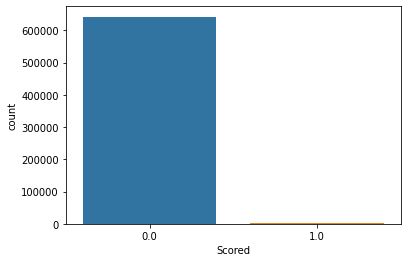

In [16]:
import seaborn as sns

sns.countplot(df["Scored"])

In [17]:
ls_j = np.where(df["Scored"] == 1)
ls_j

(array([    66,    171,    385,   1076,   1391,   1479,   1718,   2637,
          4135,   4141,   4659,   4757,   4762,   5797,   5960,   8025,
          8349,   9269,   9598,   9661,  10336,  10681,  13390,  13421,
         13511,  14117,  14226,  14776,  15869,  17309,  17729,  18741,
         19521,  21027,  21285,  23482,  25364,  25435,  25843,  28757,
         28787,  28861,  29073,  30044,  30623,  31217,  31305,  32397,
         32860,  33177,  34075,  35071,  35490,  35863,  37262,  39488,
         39656,  40150,  40422,  41708,  42062,  43573,  43722,  44119,
         45514,  47595,  48082,  48797,  48833,  49611,  50415,  50880,
         51370,  51798,  51999,  53487,  54439,  54860,  55335,  55724,
         56497,  57034,  57658,  57905,  58289,  58392,  59157,  59787,
         60630,  60800,  61568,  61626,  62814,  64152,  64305,  65226,
         65626,  65848,  68531,  70103,  70207,  72641,  72741,  73521,
         74786,  74984,  75036,  75472,  75717,  75815,  78885, 

In [18]:
len(ls_j[0])

986

In [19]:
df["time_diff"] = np.zeros(len(df))

i = 0
j = 0 
while i < ls_j[0][len(ls_j)-1]:
    df["time_diff"][i] = abs(df["eventSec"][i] - df["eventSec"][ls_j[0][j]]) 
    if i == ls_j[0][j]:
        j += 1
    i += 1

<ipython-input-19-5d8c5346a37d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_diff"][i] = abs(df["eventSec"][i] - df["eventSec"][ls_j[0][j]])


In [20]:
df["time_diff"]

0         91.837139
1         91.759619
2         89.648938
3         89.284106
4         88.053600
            ...    
643145     0.000000
643146     0.000000
643147     0.000000
643148     0.000000
643149     0.000000
Name: time_diff, Length: 643150, dtype: float64

In [21]:
df

,Unnamed: 0,subEventName,tags,positions,eventName,eventSec,role,foot,teamsData,Win_Bool,dist_centre,dist_goal_centre,Scored,time_diff
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",Pass,2.758649,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,14.365754,52.262557,0.0,91.837139
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",Pass,2.836169,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0,13.124405,53.183644,0.0,91.759619
2,1,High pass,['Accurate'],"(32.55, 53.04)",Pass,4.946850,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,31.750498,34.213946,0.0,89.648938
3,902,High pass,['Not accurate'],"(65.1, 39.44)",Pass,5.311682,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0,4.015420,59.978109,0.0,89.284106
4,2,Head pass,['Accurate'],"(53.55, 51.0)",Pass,6.542188,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,12.343115,54.220407,0.0,88.053600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643145,642431,Simple pass,['Accurate'],"(44.1, 6.12)",Pass,2922.201196,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,40.768424,57.169174,0.0,0.000000
643146,642432,High pass,['Accurate'],"(12.6, 31.28)",Pass,2929.045430,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,51.145854,16.871526,0.0,0.000000
643147,642433,Acceleration,['Accurate'],"(27.3, 61.88)",Others on the ball,2931.478354,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,40.182389,33.479462,0.0,0.000000
643148,642434,Simple pass,['Accurate'],"(63.0, 65.28)",Pass,2937.226346,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",1,22.785487,66.052467,0.0,0.000000


In [22]:
y = df["time_diff"]
X = df.drop(["Unnamed: 0", "tags", "positions", "subEventName", "teamsData", "time_diff"], axis = 1)

In [23]:
X

,eventName,eventSec,role,foot,Win_Bool,dist_centre,dist_goal_centre,Scored
0,Pass,2.758649,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,1,14.365754,52.262557,0.0
1,Pass,2.836169,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,0,13.124405,53.183644,0.0
2,Pass,4.946850,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,1,31.750498,34.213946,0.0
3,Pass,5.311682,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,0,4.015420,59.978109,0.0
4,Pass,6.542188,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,1,12.343115,54.220407,0.0
...,...,...,...,...,...,...,...,...
643145,Pass,2922.201196,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",right,1,40.768424,57.169174,0.0
643146,Pass,2929.045430,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",right,1,51.145854,16.871526,0.0
643147,Others on the ball,2931.478354,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,1,40.182389,33.479462,0.0
643148,Pass,2937.226346,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,1,22.785487,66.052467,0.0


In [24]:
X = pd.get_dummies(X)

In [25]:
X

,eventSec,Win_Bool,dist_centre,dist_goal_centre,Scored,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,"role_{'code2': 'DF', 'code3': 'DEF', 'name': 'Defender'}","role_{'code2': 'FW', 'code3': 'FWD', 'name': 'Forward'}","role_{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalkeeper'}","role_{'code2': 'MD', 'code3': 'MID', 'name': 'Midfielder'}",foot_both,foot_left,foot_right
0,2.758649,1,14.365754,52.262557,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,2.836169,0,13.124405,53.183644,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,4.946850,1,31.750498,34.213946,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,5.311682,0,4.015420,59.978109,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,6.542188,1,12.343115,54.220407,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643145,2922.201196,1,40.768424,57.169174,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
643146,2929.045430,1,51.145854,16.871526,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
643147,2931.478354,1,40.182389,33.479462,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
643148,2937.226346,1,22.785487,66.052467,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [26]:
X = X[:ls_j[0][len(ls_j[0])-1]]
y = y[:ls_j[0][len(ls_j[0])-1]]

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)

In [28]:
X_new = pd.DataFrame(X_new)
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-1.671011,1.264619,-1.254002,0.456847,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,-0.761553,2.437481,-0.218087,-0.764352,-0.050201,-0.554541,0.674018
1,-1.670919,-0.790752,-1.336384,0.522177,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,-0.761553,2.437481,-0.218087,-0.764352,-0.050201,-0.554541,0.674018
2,-1.668415,1.264619,-0.100265,-0.823305,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,1.313106,-0.410260,-0.218087,-0.764352,-0.050201,-0.554541,0.674018
3,-1.667983,-0.790752,-1.940901,1.004095,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,1.313106,-0.410260,-0.218087,-0.764352,-0.050201,-0.554541,0.674018
4,-1.666523,1.264619,-1.388234,0.595713,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,-0.761553,-0.410260,-0.218087,1.308297,-0.050201,1.803295,-1.483639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642844,1.032357,-0.790752,-0.984529,0.462374,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,1.313106,-0.410260,-0.218087,-0.764352,-0.050201,-0.554541,0.674018
642845,1.033055,1.264619,-0.806282,0.619914,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,1.313106,-0.410260,-0.218087,-0.764352,-0.050201,-0.554541,0.674018
642846,1.035370,1.264619,-1.903188,1.003289,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,-0.761553,-0.410260,-0.218087,1.308297,-0.050201,-0.554541,0.674018
642847,1.036425,-0.790752,-0.016096,1.662207,-0.039174,-0.61547,-0.113197,-0.245011,-0.044421,-0.211493,-0.049274,-0.293761,0.978242,-0.072334,-0.115376,1.313106,-0.410260,-0.218087,-0.764352,-0.050201,-0.554541,0.674018


## Machine Learning

In [29]:
import xgboost
print(xgboost.__version__)

1.3.3


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)


array([[-1.67101121,  1.26461855, -1.25400204, ..., -0.05020104,
        -0.55454053,  0.67401849],
       [-1.67091925, -0.79075228, -1.33638408, ..., -0.05020104,
        -0.55454053,  0.67401849],
       [-1.66841536,  1.26461855, -0.10026549, ..., -0.05020104,
        -0.55454053,  0.67401849],
       ...,
       [ 1.03537014,  1.26461855, -1.90318848, ..., -0.05020104,
        -0.55454053,  0.67401849],
       [ 1.03642505, -0.79075228, -0.0160955 , ..., -0.05020104,
        -0.55454053,  0.67401849],
       [ 1.03705845,  1.26461855, -1.48483222, ..., -0.05020104,
        -0.55454053,  0.67401849]])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# fit models to train data
m_linearReg = LinearRegression().fit(X_train, y_train)
m_lasso = Lasso().fit(X_train, y_train)
m_ridge = Ridge().fit(X_train, y_train)
m_tree = DecisionTreeRegressor().fit(X_train, y_train)
m_xgboost = XGBRegressor().fit(X_train, y_train)
#m_knn = KNeighborsRegressor().fit(X_train, y_train)

# compute predictions of each model on the train data
ypred_train_linearReg = m_linearReg.predict(X_train)
ypred_train_lasso = m_lasso.predict(X_train)
ypred_train_ridge = m_ridge.predict(X_train)
ypred_train_tree = m_tree.predict(X_train)
ypred_train_xgb = m_xgboost.predict(X_train)
#ypred_train_knn = m_knn.predict(X_train)

# compute predictions of each model on the test data
ypred_test_linearReg = m_linearReg.predict(X_test)
ypred_test_lasso = m_lasso.predict(X_test)
ypred_test_ridge = m_ridge.predict(X_test)
ypred_test_tree = m_tree.predict(X_test)
ypred_test_xgb = m_xgboost.predict(X_test)
#ypred_test_knn = m_knn.predict(X_test)


In [32]:
import pandas as pd

# first compute metrics and store them in array
loss_data = [
    ['linear regression', 
     mean_squared_error(y_train, ypred_train_linearReg), 
     mean_squared_error(y_test, ypred_test_linearReg), 
     mean_absolute_error(y_train, ypred_train_linearReg), 
     mean_absolute_error(y_test, ypred_test_linearReg)
    ],
    ['lasso', 
     mean_squared_error(y_train, ypred_train_lasso), 
     mean_squared_error(y_test, ypred_test_lasso),
     mean_absolute_error(y_train, ypred_train_lasso), 
     mean_absolute_error(y_test, ypred_test_lasso)
    ],
    ['ridge', 
     mean_squared_error(y_train, ypred_train_ridge), 
     mean_squared_error(y_test, ypred_test_ridge),
     mean_absolute_error(y_train, ypred_train_ridge), 
     mean_absolute_error(y_test, ypred_test_ridge)
    ], 
    ['tree regression', 
     mean_squared_error(y_train, ypred_train_tree), 
     mean_squared_error(y_test, ypred_test_tree), 
     mean_absolute_error(y_train, ypred_train_tree), 
     mean_absolute_error(y_test, ypred_test_tree)
    ],
    ['XGBoost regression', 
     mean_squared_error(y_train, ypred_train_xgb), 
     mean_squared_error(y_test, ypred_test_xgb), 
     mean_absolute_error(y_train, ypred_train_xgb), 
     mean_absolute_error(y_test, ypred_test_xgb)
    ]
]

# create a pandas dataframe and feed it the array and naming the columns
loss_df = pd.DataFrame(loss_data, 
                       columns=['Model', 'train MSE', 'test MSE', 'train MAE', 'test MAE'])
print(loss_df)

                Model  train MSE  test MSE  train MAE  test MAE
0   linear regression   0.390333  0.000168   0.016556  0.010669
1               lasso   0.390367  0.000111   0.014728  0.008763
2               ridge   0.390333  0.000168   0.016556  0.010668
3     tree regression   0.000000  0.348340   0.000000  0.005289
4  XGBoost regression   0.014256  0.120386   0.003545  0.007329


## Hyperparameter Tuning for Lasso


In [33]:
#Most of the time K-Fold Cross Validation is used when we don't have enough data.
#Use K = 2

from sklearn.model_selection import GridSearchCV

alpha_grid = np.linspace(0.0001, 2, 100)
grid_lr = GridSearchCV(estimator=Lasso(),
                       cv=2, 
                       param_grid={'alpha': alpha_grid})
grid_lr.fit(X_train, y_train)
Cbest = grid_lr.best_params_['alpha']


/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

In [34]:
m_lasso = Lasso(alpha = Cbest)
m_lasso.fit(X_train, y_train)
ypred_train_lasso = m_lasso.predict(X_train)
ypred_test_lasso = m_lasso.predict(X_test)


In [35]:
print(mean_squared_error(y_train, ypred_train_lasso))
print(mean_squared_error(y_test, ypred_test_lasso))
print(mean_absolute_error(y_train, ypred_train_lasso))
print(mean_absolute_error(y_test, ypred_test_lasso))

0.39033522950059274
0.00016260641810337997
0.016394420311368313
0.01049938662586401


## Hyperparameter Tuning for Ridge

In [36]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.linspace(0.0001, 2, 100)
grid_lr = GridSearchCV(estimator=Ridge(),
                       cv=2, 
                       param_grid={'alpha': alpha_grid})
grid_lr.fit(X_train, y_train)
alpha_best = grid_lr.best_params_['alpha']

In [37]:
m_lasso = Lasso(alpha = alpha_best)
m_lasso.fit(X_train, y_train)
ypred_train_lasso = m_lasso.predict(X_train)
ypred_test_lasso = m_lasso.predict(X_test)

In [38]:
print(mean_squared_error(y_train, ypred_train_ridge))
print(mean_squared_error(y_test, ypred_test_ridge))
print(mean_absolute_error(y_train, ypred_train_ridge))
print(mean_absolute_error(y_test, ypred_test_ridge))

0.3903326476855285
0.00016848505599184385
0.016556176640471227
0.010668471596359731


## Hyperparameter Tuning for Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "splitter": ["best", "random"], 
    "max_depth": [0,1,2,3,4,5,6,7,8]
}

grid_lr = GridSearchCV(estimator = DecisionTreeRegressor(criterion = "squared_error"),
                       cv = 2, 
                       param_grid = param_grid)
grid_lr.fit(X_train, y_train)
splitter_best = grid_lr.best_params_['splitter']
depth_best = grid_lr.best_params_['max_depth']

DecisionTreeRegressor(criterion = "squared error", splitter = splitter_best, max_depth = depth_best)

/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1342, in fit
    super().fit(
  File "/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    check_scalar(
  File "/Users

DecisionTreeRegressor(criterion='squared error', max_depth=1)

## Hyperparameter Tuning for XGBoost Regression